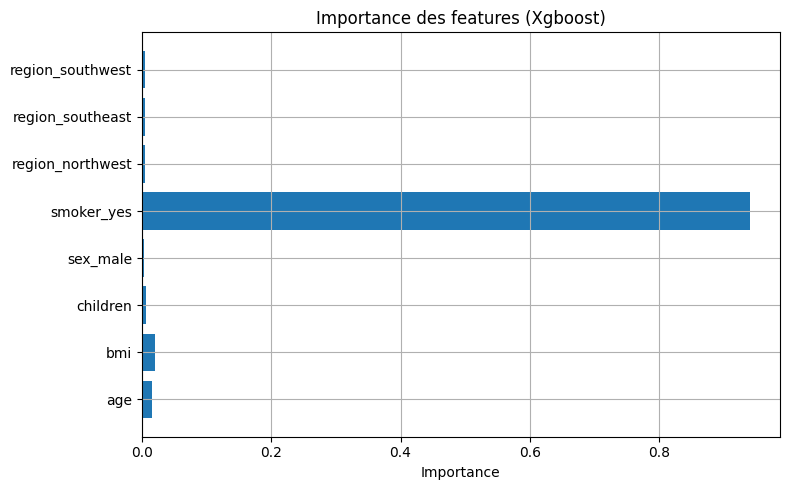

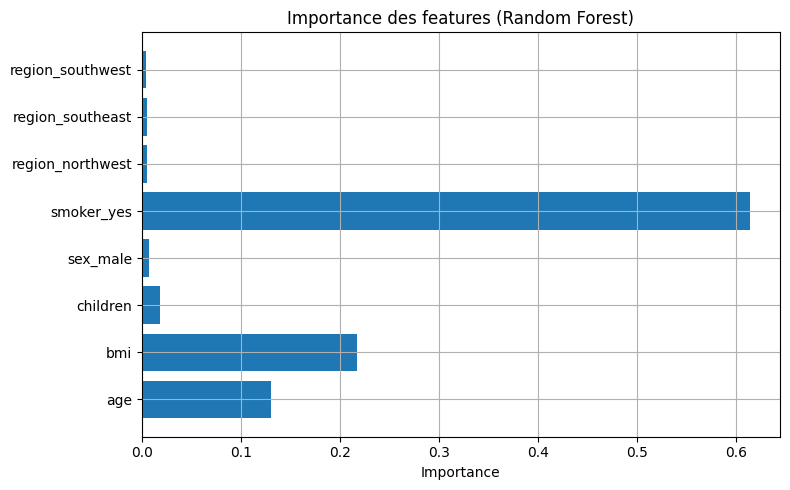

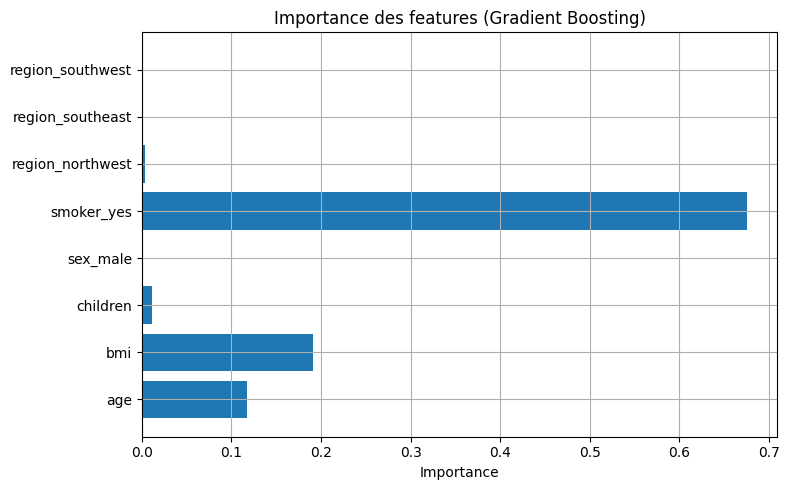

In [7]:
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt

models_dir = "models"

model_files = [f for f in os.listdir(models_dir) if f.endswith(".pkl")]

for filename in model_files:
    model_name = filename.replace(".pkl", "").replace("_", " ").title()
    model_path = os.path.join(models_dir, filename)

    model = joblib.load(model_path)

    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_

        cols_path = os.path.join(models_dir, filename.replace(".pkl", "_columns.json"))
        if os.path.exists(cols_path):
            import json
            with open(cols_path) as f:
                feature_names = json.load(f)

            plt.figure(figsize=(8, 5))
            plt.barh(feature_names, importances)
            plt.xlabel("Importance")
            plt.title(f"Importance des features ({model_name})")
            plt.grid(True)
            plt.tight_layout()
            plt.show()



=== SHAP plots pour Random Forest ===


 97%|=================== | 1292/1338 [00:17<00:00]       

Bar plot (importance moyenne)


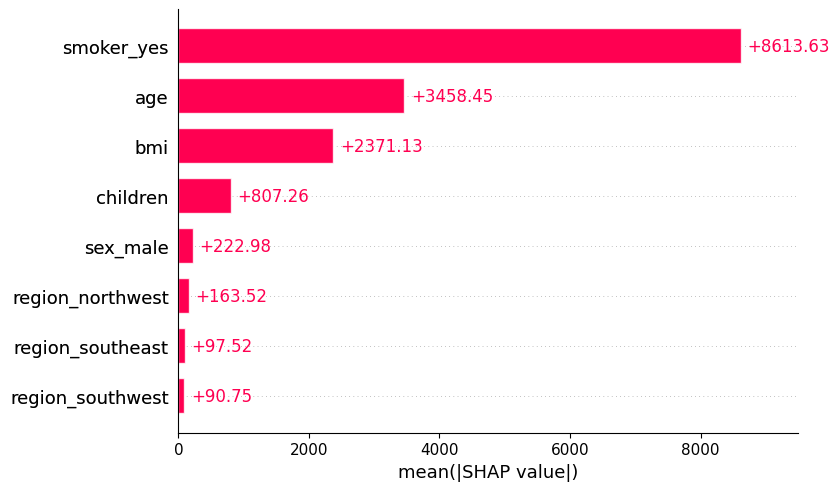

Beeswarm plot (dispersion des effets)


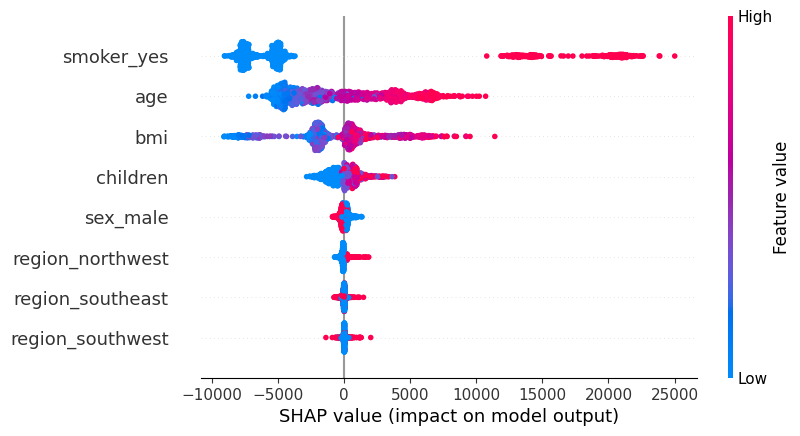


=== SHAP plots pour Gradient Boosting ===
Bar plot (importance moyenne)


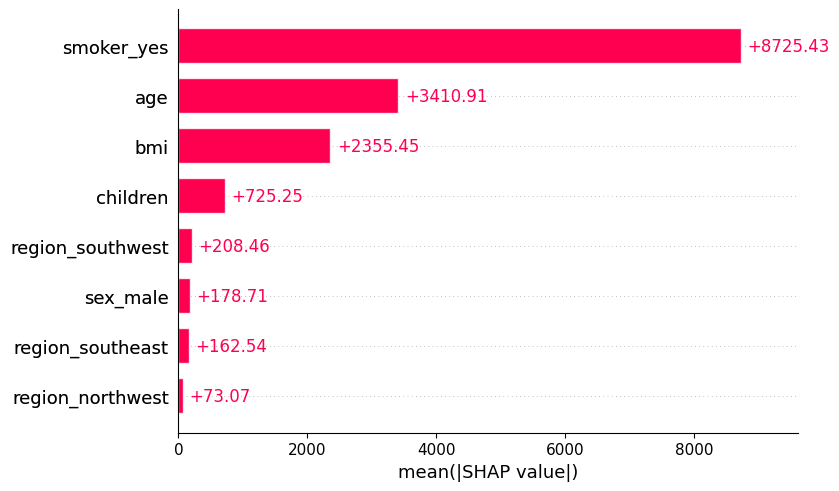

Beeswarm plot (dispersion des effets)


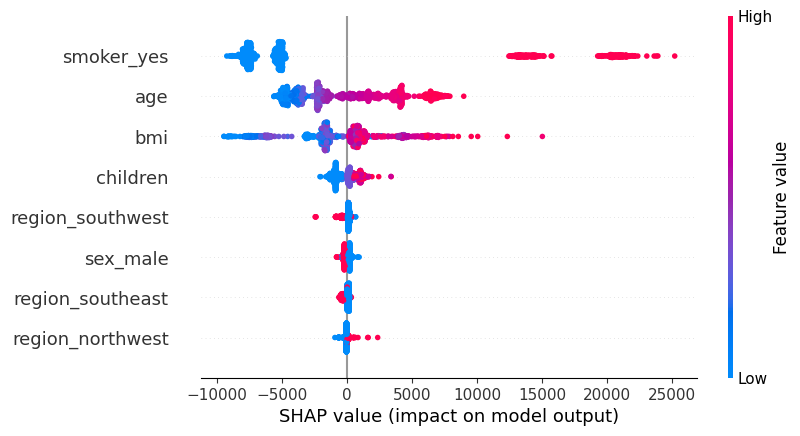


=== SHAP plots pour Xgboost ===
Bar plot (importance moyenne)


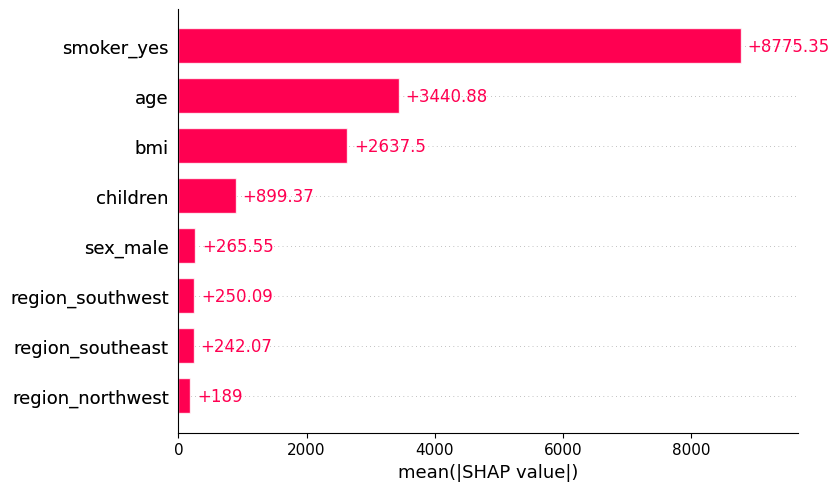

Beeswarm plot (dispersion des effets)


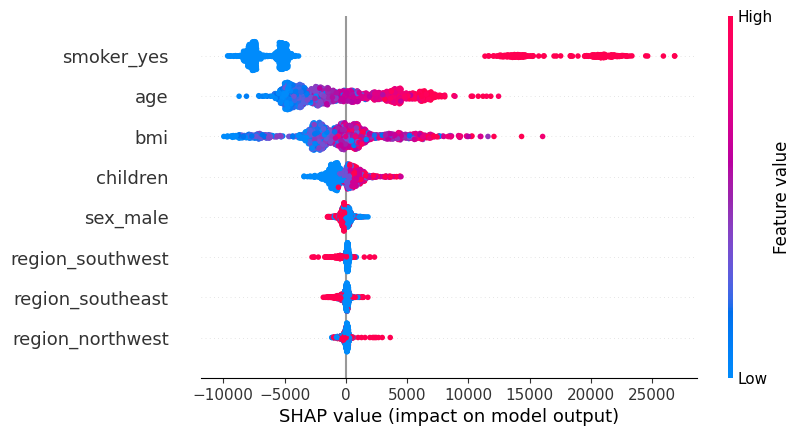

In [9]:
import shap

shap_compatibles_model_names = ["random_forest", "gradient_boosting", "xgboost"]

df = pd.read_csv("data_src/inssurance.csv")
X = pd.get_dummies(df.drop("charges", axis=1), drop_first=True)
X = X.astype(float)

for name in shap_compatibles_model_names:
    model_path = os.path.join(models_dir, f"{name}.pkl")
    cols_path = os.path.join(models_dir, f"{name}_columns.json")

    print(f"\n=== SHAP plots pour {name.replace('_', ' ').title()} ===")

    try:
        model = joblib.load(model_path)
        with open(cols_path) as f:
            columns = json.load(f)

        X_shap = X.copy()
        for col in columns:
            if col not in X_shap:
                X_shap[col] = 0
        X_shap = X_shap[columns]

        explainer = shap.Explainer(model, X_shap)
        shap_values = explainer(X_shap, check_additivity=False)

        print("Bar plot (importance moyenne)")
        shap.plots.bar(shap_values, max_display=10)

        print("Beeswarm plot (dispersion des effets)")
        shap.plots.beeswarm(shap_values, max_display=10)

    except Exception as e:
        print(f"Erreur avec SHAP pour {name}: {e}")
